Team members:
Kassem Yassine
Mohamad Nassereddine

In [6]:
import pandas as pd

# Path to your Excel file
file_path = '2024_PersonalityTraits_SurveyData.xls'
data = pd.read_excel(file_path)

In [7]:
print("Number of columns in the DataFrame:", data.shape[1])

Number of columns in the DataFrame: 48


Removing the first column because it's inrelevant

In [8]:
#Removing first column

data.drop(data.columns[0], axis=1, inplace=True)

This line of code is used to count and display the number of missing (null) values in each column of your DataFrame. It helps identify columns that require further cleaning or imputation before analysis or modeling can proceed effectively.

In [9]:
print(data.isnull().sum())

Sector                                                                                                                                                                                0
Last page                                                                                                                                                                             0
Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?                                                                        0
I see myself as someone who is extraverted, enthusiastic:                                                                                                                             0
I see myself as someone who is critical, quarrelsome:                                                                                                                                 8
I see myself as someone who is dependable, self-disciplined:                    

This block of code is used to clean the dataset by removing columns that have a high number of missing values, specifically more than half of the rows. It ensures that the data used for analysis is more complete and reduces the bias that can be introduced by imputing a large number of missing values.

In [10]:
# Calculate the threshold for missing values
threshold = len(data) / 2

# Drop columns where the number of missing values is greater than the threshold
data.dropna(axis=1, thresh=threshold, inplace=True)

# Display the DataFrame to confirm columns have been removed
print(data.head())

    Sector  Last page  \
0  Private          5   
1  Private          5   
2  Private          5   
3  Private          5   
4  Private          5   

  Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?  \
0                                                Yes                                                               
1                                                Yes                                                               
2                                                Yes                                                               
3                                                Yes                                                               
4                                                Yes                                                               

  I see myself as someone who is extraverted, enthusiastic:  \
0                                     Agree strongly          
1                         

In [11]:
print("Number of columns in the DataFrame:", data.shape[1])

Number of columns in the DataFrame: 43


This code is used to handle missing values in a specific column by filling them with the most frequently occurring value (mode) of that column. 

In [12]:
mode_value = data['I see myself as someone who is critical, quarrelsome:'].mode()[0]
data['I see myself as someone who is critical, quarrelsome:'].fillna(mode_value, inplace=True)


C:\Users\kasse\AppData\Local\Temp\ipykernel_9136\3420235148.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['I see myself as someone who is critical, quarrelsome:'].fillna(mode_value, inplace=True)


This code fills missing values in the columns related to cigarette brands with the string 'Unknown'. 

In [13]:
data['What is your favorite or preferred cigarette brand(s) if you were able to access it?'].fillna('Unknown', inplace=True)
data['What cigarette brand(s) are you currently using?'].fillna('Unknown', inplace=True)

C:\Users\kasse\AppData\Local\Temp\ipykernel_9136\2329735445.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['What is your favorite or preferred cigarette brand(s) if you were able to access it?'].fillna('Unknown', inplace=True)
C:\Users\kasse\AppData\Local\Temp\ipykernel_9136\2329735445.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

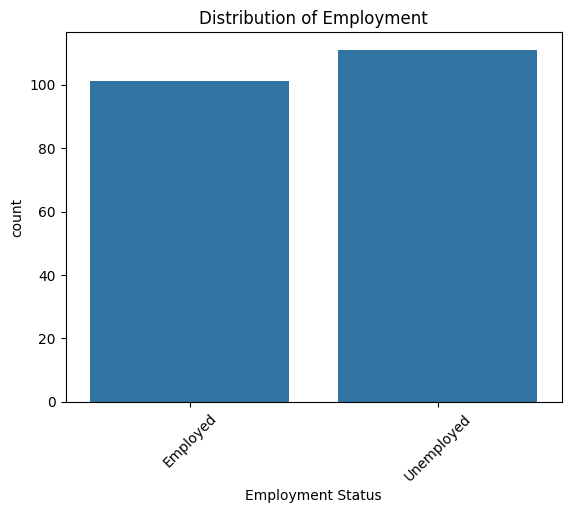

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Employment Status', data=data)
plt.title('Distribution of Employment')
plt.xticks(rotation=45)
plt.show()


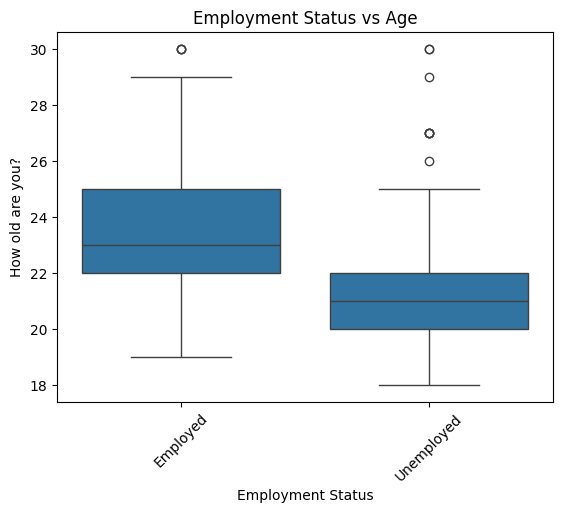

In [16]:
sns.boxplot(x='Employment Status', y='How old are you?', data=data)
plt.title('Employment Status vs Age')
plt.xticks(rotation=45)
plt.show()

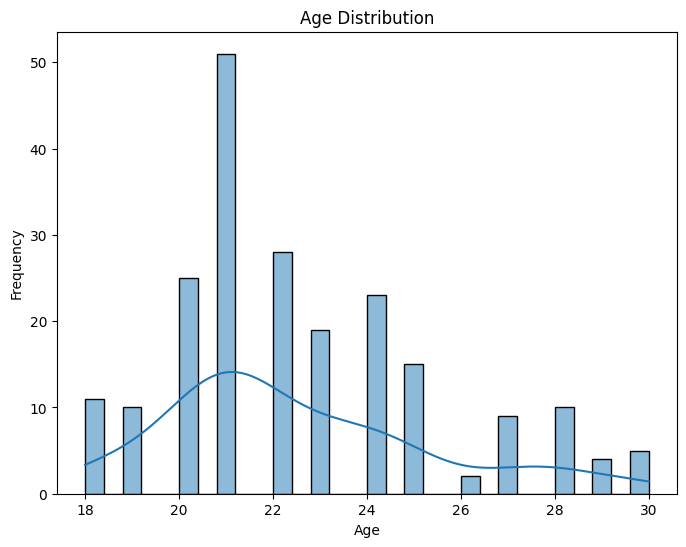

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(data['How old are you?'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

unnecessary column

In [18]:
if 'Last page' in data.columns:
    data.drop(columns=['Last page'], inplace=True)
    print("The 'Last page' column has been removed.")
else:
    print("The 'Last page' column does not exist in the DataFrame.")

The 'Last page' column has been removed.


inputs having garmmatical errors and not consistent 

In [20]:
columns_to_remove = [
    'What is your favorite or preferred cigarette brand(s) if you were able to access it?',
    'What cigarette brand(s) are you currently using?'
]

# Remove the specified columns from the dataset
data = data.drop(columns=columns_to_remove, errors='ignore')

The purpose of the cramers_v function is to calculate Cramér's V, a statistical measure that quantifies the association between two categorical variables. This helps in understanding how strongly two categorical features are related

In [21]:
import scipy.stats as ss
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

The code is used to evaluate the strength of the association between each categorical feature in a dataset and a specified target variable, which in this case measures employment status

In [22]:

categorical_data = data.select_dtypes(include=['object', 'category', 'bool'])

# Target variable
target_variable = 'Employment Status'

# Initialize an empty DataFrame to store the Cramér's V values
cramers_v_values = pd.Series(index=categorical_data.columns, dtype=float)

# Calculate Cramér's V for each column with the target variable
for col in categorical_data.columns:
    if col != target_variable:
        cramers_v_values[col] = cramers_v(categorical_data[col], categorical_data[target_variable])

# Print the Cramér's V values
print(cramers_v_values)

Sector                                                                                                                                                                              0.000000
Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?                                                                           NaN
I see myself as someone who is extraverted, enthusiastic:                                                                                                                           0.000000
I see myself as someone who is critical, quarrelsome:                                                                                                                               0.096927
I see myself as someone who is dependable, self-disciplined:                                                                                                                        0.094434
I see myself as someone who is anxious, easily upset:  

C:\Users\kasse\AppData\Local\Temp\ipykernel_9136\3849223003.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


This code visualizes the computed Cramér's V values as a bar chart, allowing you to easily assess the strength of association between various categorical features and the stress level target variable employment status

C:\Users\kasse\AppData\Local\Temp\ipykernel_9136\1757557565.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels


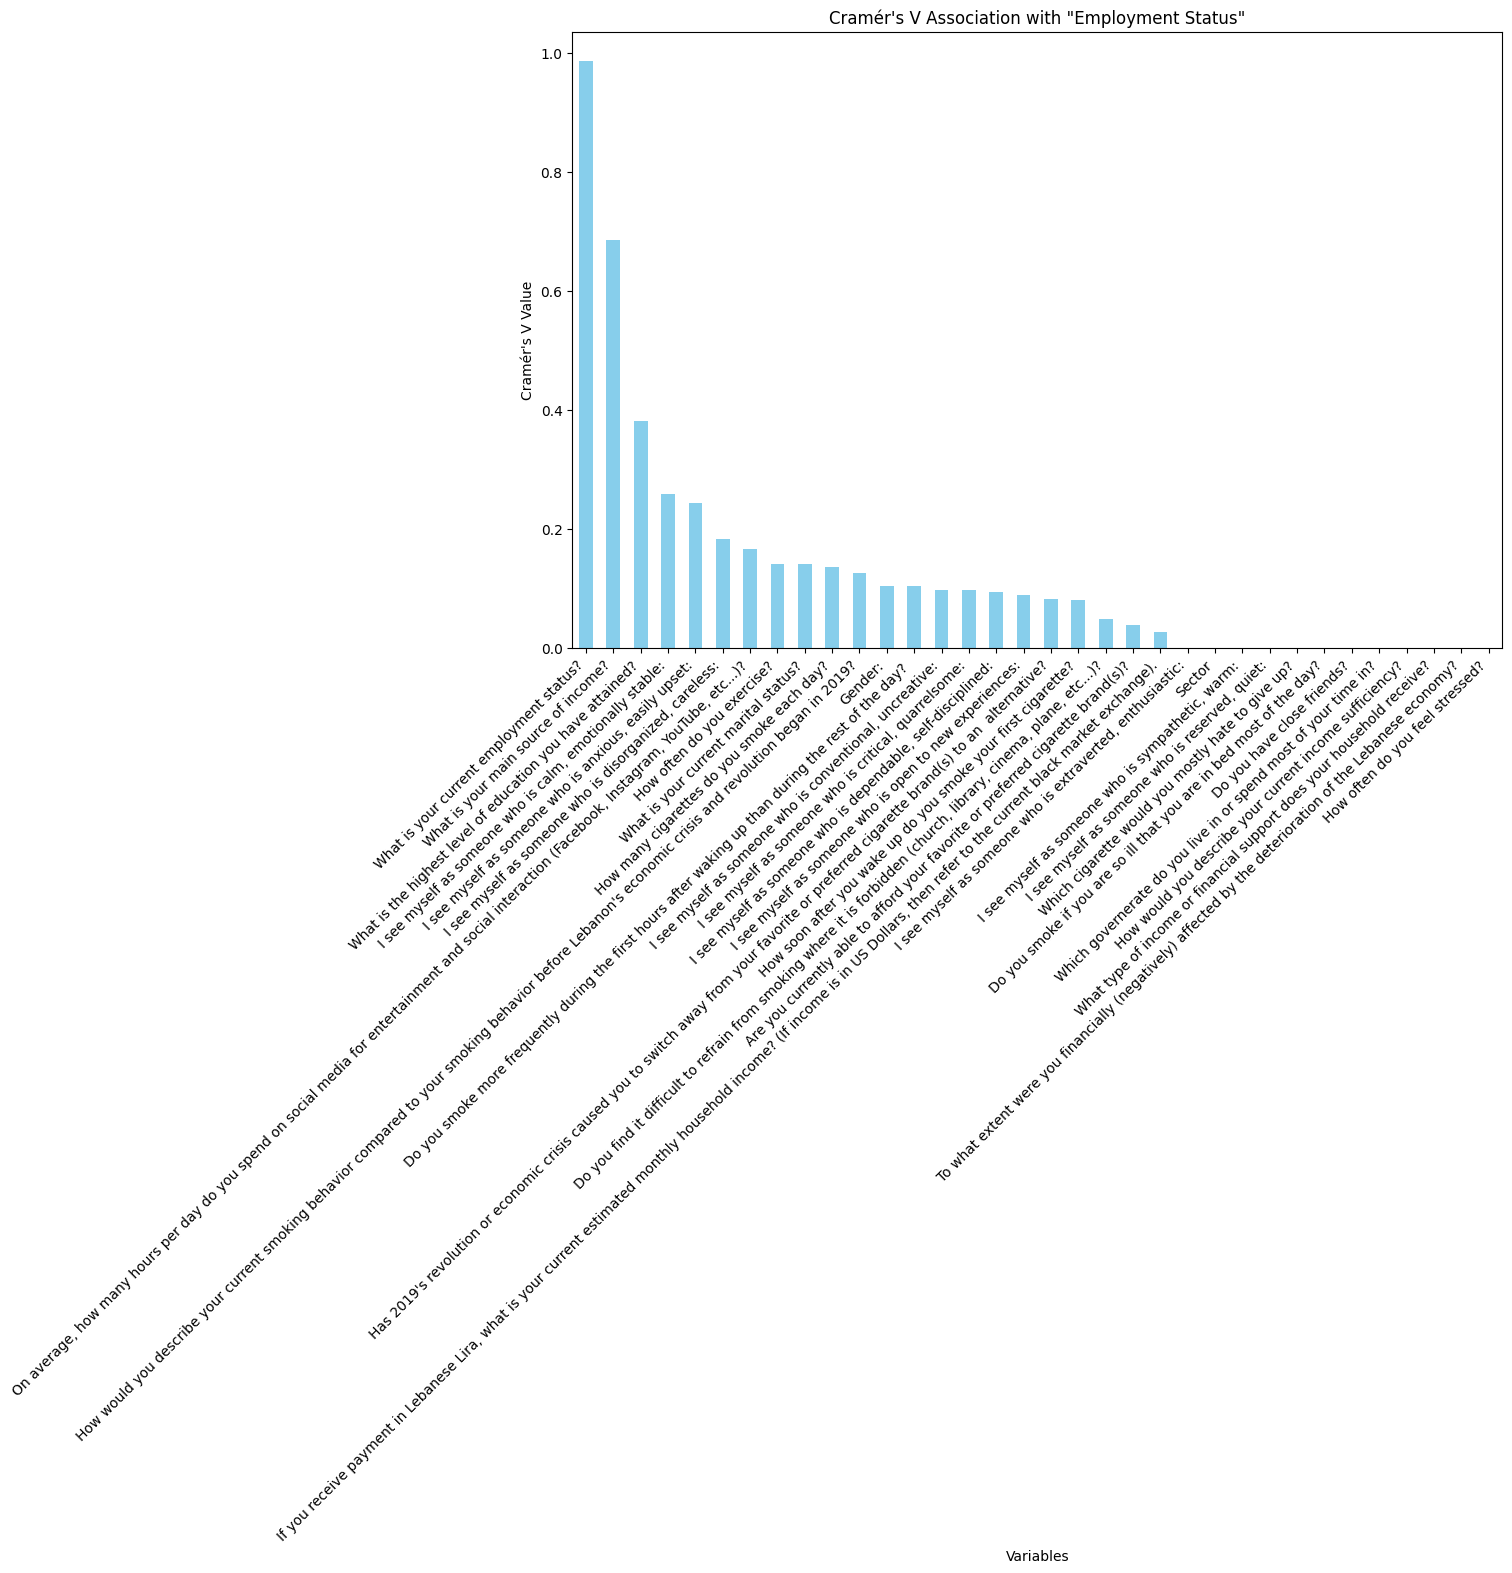

In [23]:
plt.figure(figsize=(12, 8))
cramers_v_values.dropna().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Cramér\'s V Association with "Employment Status"')
plt.ylabel('Cramér\'s V Value')
plt.xlabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

it has the same value for all entries

In [24]:
#nan value 
columns_to_remove = [
    'Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?'
 
]

# Remove the specified columns from the dataset
data = data.drop(columns=columns_to_remove, errors='ignore')


In [25]:
unique_values = data['Employment Status'].value_counts(dropna=False)
print(unique_values)

Employment Status
Unemployed    111
Employed      101
Name: count, dtype: int64


This code converts the 'Employment Status' feature from a categorical to a numeric format for model compatibility, and applies one-hot encoding to other categorical variables in the dataset

In [26]:
data['Employment Status'] = data['Employment Status'].map({'Employed': 1, 'Unemployed': 0})

# Selecting categorical columns except for the target variable 'Employment Status'
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Applying one-hot encoding to the categorical variables
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [27]:
unique_values = data['Employment Status'].value_counts(dropna=False)
print(unique_values)

Employment Status
0    111
1    101
Name: count, dtype: int64


In the process described, data is initially divided into three parts: training, validation, and testing. The training set is used to teach the logistic regression model how to predict employment status based on input features that have been enhanced with polynomial transformations (feature engineering). By applying these transformations, the model can understand not just direct effects but also interactions between different features.

After training, the model is first applied to the validation set. This step is crucial because it allows for the fine-tuning of the model’s settings without risking bias from the test data, which must remain completely unseen until the final evaluation. The validation phase helps ensure that any adjustments made to improve the model's accuracy are genuinely effective and not just tailored to one particular set of data. Once the model is tuned, it’s tested on the test set, providing an unbiased assessment of how well it can predict employment status in new, unseen data scenarios. 

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'data' is your DataFrame and preprocessing is done
X = data.drop('Employment Status', axis=1)  # Features
y = data['Employment Status']  # Target variable

# First, split into training and a temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Now, split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)  # This results in 20% test, 20% validation

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)  # Transform the validation set
X_test_poly = poly.transform(X_test)  # Transform the test set

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000000)
model.fit(X_train_poly, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val_poly)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# After validation tuning, predict on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Validation Accuracy: 0.8947368421052632
Test Accuracy: 0.9615384615384616
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.92      1.00      0.96        11

    accuracy                           0.96        26
   macro avg       0.96      0.97      0.96        26
weighted avg       0.96      0.96      0.96        26

